<a href="https://colab.research.google.com/gist/tanmaykulkarni2112/63b6e2366a6269ae8cddf08ca1b530ea/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Csv file is present in mail

Creating dataframe and checking for null, NaN values

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("StudentsPerformance.csv")
print("checking for null value containing column")
nullCol = df["Math_Score"].isnull()
nullCol

# print("checking for not null value containing column")
# isNotNullCol = df["Math_Score"].notnull()
# isNotNullCol


Creaitng another dataframe
- Replace the NaN and null values with the mean of the column respectively

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("StudentsPerformance.csv")
# ndf = df.replace(to_replace=np.nan, value=0)
ndf = df
ndf["Math_Score"] = ndf['Math_Score'].fillna(ndf['Math_Score'].mean())
ndf["Reading_Score"] = ndf['Reading_Score'].fillna(ndf['Reading_Score'].mean())
ndf["Writing_Score"] = ndf['Writing_Score'].fillna(ndf['Writing_Score'].mean())
ndf["Placement_Score"] = ndf['Placement_Score'].fillna(ndf['Placement_Score'].mean())
ndf["Club_Join_Date"] = ndf['Club_Join_Date'].fillna(np.ceil(ndf['Club_Join_Date'].mean()))
ndf["placement offer count"] = ndf['placement offer count'].fillna(np.ceil(ndf['placement offer count'].mean()))
ndf

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,placement offer count
0,95.000000,84.000000,75.000000,81.000000,2021.0,2.0
1,74.000000,78.000000,60.000000,94.000000,2021.0,3.0
2,69.000000,80.571429,69.000000,87.000000,2018.0,3.0
3,79.000000,80.571429,77.000000,45.000000,2021.0,1.0
4,71.000000,87.000000,63.000000,95.000000,2018.0,3.0
5,67.000000,91.000000,76.000000,99.000000,2020.0,3.0
6,77.000000,92.000000,69.000000,99.000000,2021.0,1.0
7,22.000000,83.000000,75.000000,91.000000,2018.0,3.0
8,76.000000,66.000000,64.000000,76.000000,2019.0,2.0
9,74.000000,90.000000,69.000000,84.275862,2021.0,3.0


# CREATING THE BOXPLOT FOR THE MATH SCORE

<Axes: >

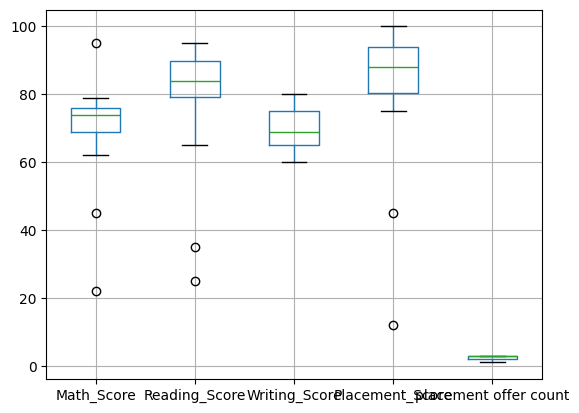

In [ ]:
import numpy as np
import pandas as pd
col = ['Math_Score', 'Reading_Score', 'Writing_Score', 'Placement_Score', 'placement offer count']
ndf.boxplot(col)


Idenifying Outliers using Scatterplot

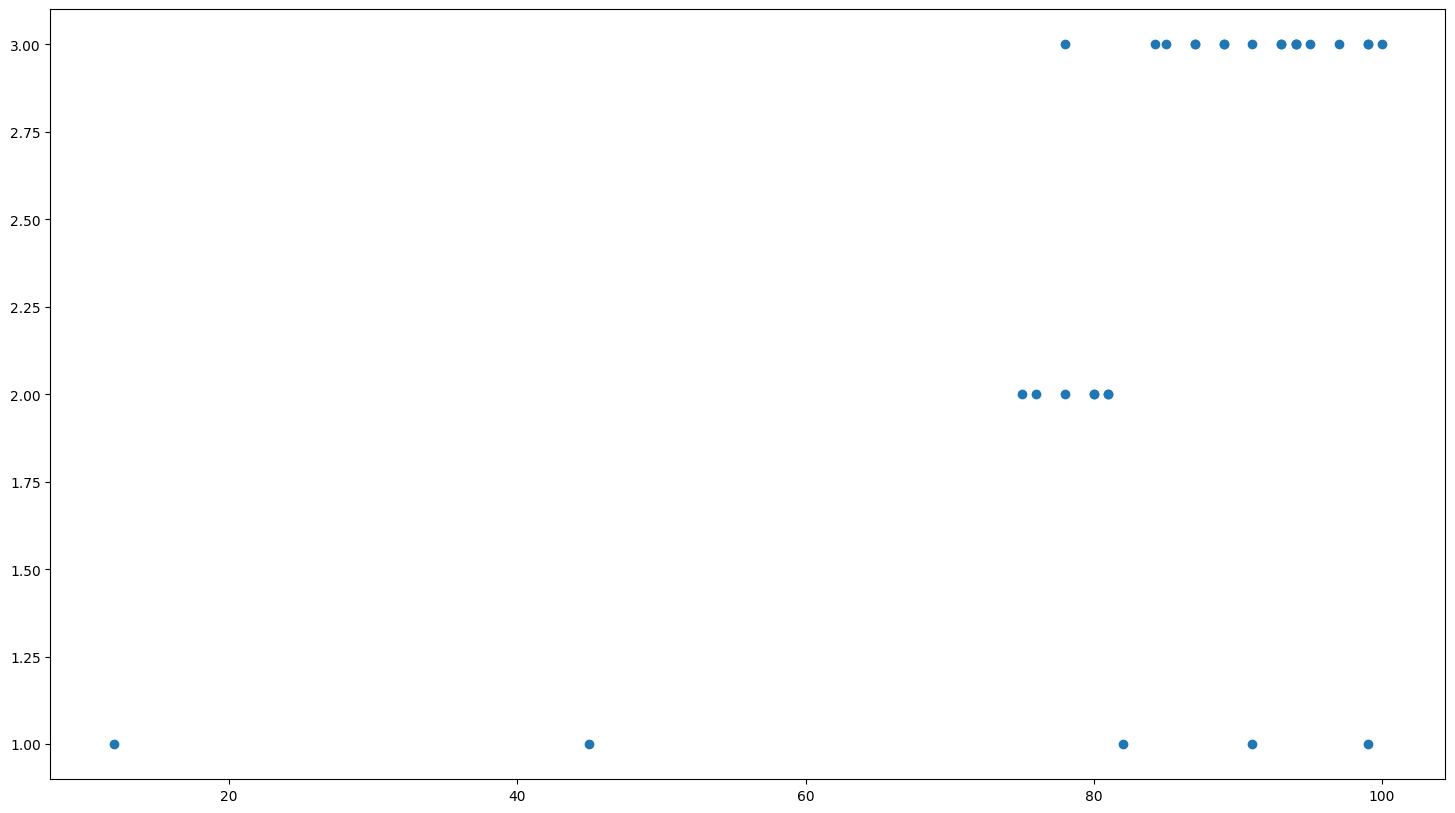

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("StudentsPerformance.csv")
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(ndf['Placement_Score'], ndf['placement offer count'])
plt.show()


Identifying the outliers using Z-Score analysis

In [7]:
import numpy as np
from scipy import stats
df=pd.read_csv("StudentsPerformance.csv")
z = np.abs(stats.zscore(ndf['Math_Score']))
# print(z)
threshold = 0.18
sample_outliers = np.where(z <threshold)
sample_outliers


(array([ 2,  4, 11, 12, 13, 22, 26]),)

# InterQuartile

In [4]:
import numpy as np
sorted_rscore= sorted(ndf['Reading_Score'])
sorted_rscore
q1 = np.percentile(sorted_rscore, 25)
q3 = np.percentile(sorted_rscore, 75)
print(q1,q3)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print(lwr_bound, upr_bound)
r_outliers = []
for i in sorted_rscore:
  if (i<lwr_bound or i>upr_bound):
    r_outliers.append(i)
    print(r_outliers)

79.25 89.75
63.5 105.5
[25.0]
[25.0, 35.0]


Cleaning the Outliers


In [8]:
new_df=ndf
for i in sample_outliers:
  new_df.drop(i,inplace=True)
new_df

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,placement offer count
0,95.0,84.000000,75.000000,81.000000,2021.0,2.0
1,74.0,78.000000,60.000000,94.000000,2021.0,3.0
3,79.0,80.571429,77.000000,45.000000,2021.0,1.0
5,67.0,91.000000,76.000000,99.000000,2020.0,3.0
6,77.0,92.000000,69.000000,99.000000,2021.0,1.0
7,22.0,83.000000,75.000000,91.000000,2018.0,3.0
8,76.0,66.000000,64.000000,76.000000,2019.0,2.0
9,74.0,90.000000,69.000000,84.275862,2021.0,3.0
10,65.0,79.000000,66.000000,100.000000,2020.0,3.0
14,74.0,88.000000,80.000000,12.000000,2020.0,1.0


Data Transformation

<Axes: ylabel='Frequency'>

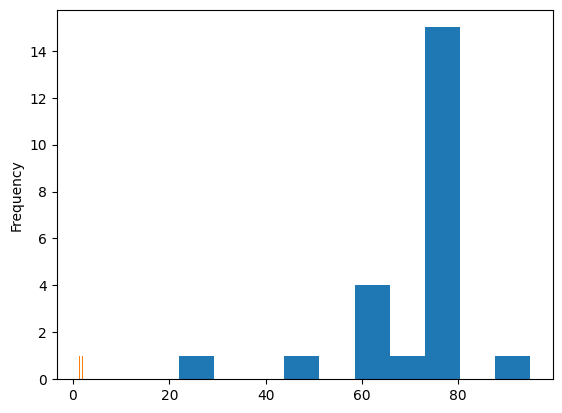

In [12]:
import matplotlib.pyplot as plt
new_df['Math_Score'].plot(kind = 'hist')
df['log_math'] = np.log10(ndf['Math_Score'])
df['log_math'].plot(kind = 'hist')

> Math_Score

<Axes: ylabel='Frequency'>

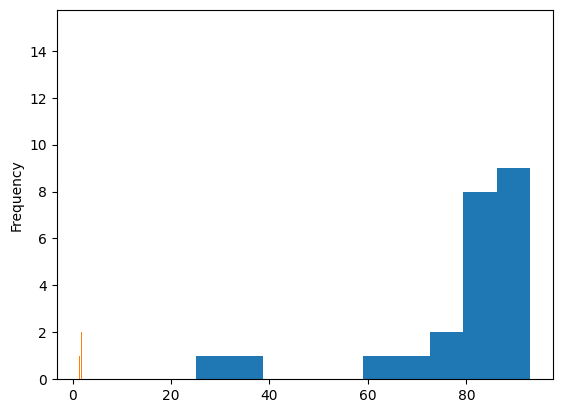

In [13]:
import matplotlib.pyplot as plt
new_df['Reading_Score'].plot(kind = 'hist')
df['log_math'] = np.log10(ndf['Reading_Score'])
df['log_math'].plot(kind = 'hist')

> Reading_Score

<Axes: ylabel='Frequency'>

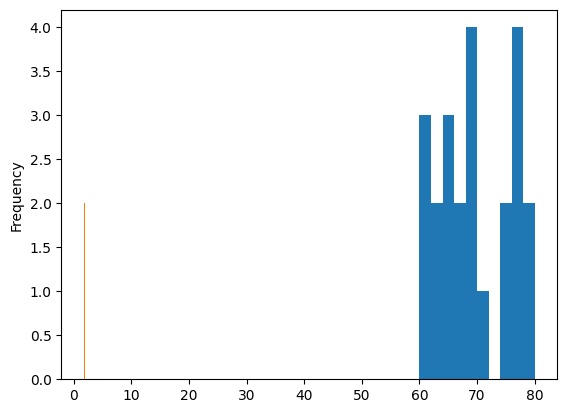

In [14]:
import matplotlib.pyplot as plt
new_df['Writing_Score'].plot(kind = 'hist')
df['log_math'] = np.log10(ndf['Writing_Score'])
df['log_math'].plot(kind = 'hist')

> Writing_Score

<Axes: ylabel='Frequency'>

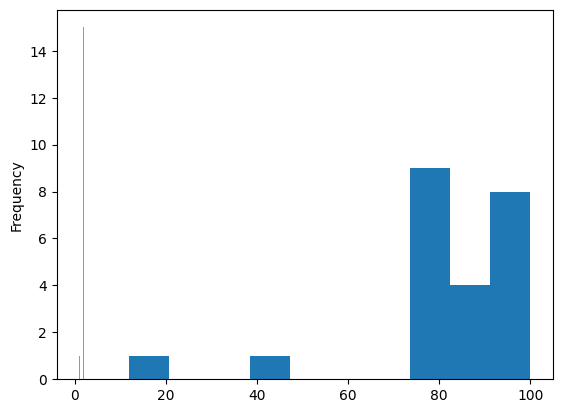

In [15]:
import matplotlib.pyplot as plt
new_df['Placement_Score'].plot(kind = 'hist')
df['log_math'] = np.log10(ndf['Placement_Score'])
df['log_math'].plot(kind = 'hist')

> Placement_Score